In [1]:
matplotlib inline

In [2]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 11, 4
plt.rcParams['figure.figsize'] = 19, 6
plt.rcParams['figure.figsize'] = 22, 6

In [3]:
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.signal import decimate

from obspy import UTCDateTime

In [5]:
import sys  #added by an 20200516

In [6]:
import scipy as sp
import obspy as ob
print("# numpy version = ",np.__version__)
print("# scipy version = ",sp.__version__)
print("# pandas version = ",pd.__version__)
print("# obspy version = ",ob.__version__)

# numpy version =  1.19.5
# scipy version =  1.5.2
# pandas version =  1.4.2
# obspy version =  1.2.2


In [7]:
def heaviside(x):
    return 0.5*(np.sign(x) + 1)    


In [8]:
def heaviside2(x):
    return np.sign(x)    #modified by an 20200420

In [9]:
# a -> eqT 
# c == 1000000 -> steep step
# c  = 1 smooth step 
def step(x, a, c):
    return 1/(1+(np.exp(-2*c *(x-a))) )  


In [10]:
import math
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
def decimal_year(time):
        """
        Return (floating point) decimal year representation of UTCDateTime
        input value
        """
        start_of_year = UTCDateTime(time.year, 1, 1).timestamp
        end_of_year = UTCDateTime(time.year + 1, 1, 1).timestamp
        timestamp = time.timestamp
        year_fraction = ((timestamp - start_of_year) /
                         (end_of_year - start_of_year))
        return time.year + year_fraction

In [12]:
def year_decimal(start):
    year = int(start)
    rem = start - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #print(result)
    return result

In [13]:
## inc long term trend
def func(x, e1, e2, f, A, B, e3, e4):
  return   A + B*x+e1*np.sin(2*math.pi*f*x) + e2*np.cos(2*math.pi*f*x) + \
                        e3*np.sin(4*math.pi*f*x) + e4*np.cos(4*math.pi*f*x)

In [14]:
## inc long term trend
def func_eq(x, e1, e2, f, A, B, e3, e4, C, D, E, eqT):
  return   A + B*x+e1*np.sin(2*math.pi*f*x) + e2*np.cos(2*math.pi*f*x) + \
                        e3*np.sin(4*math.pi*f*x) + e4*np.cos(4*math.pi*f*x) +  \
                        (C+  (D*np.exp(-(x-eqT)/E) ) )*heaviside(x-eqT) 

In [15]:
def func_eq_step(x, e1, e2, f, A, B, e3, e4, C, D, E, eqT, sc):
  return   A + B*x+e1*np.sin(2*math.pi*f*x) + e2*np.cos(2*math.pi*f*x) + \
                        e3*np.sin(4*math.pi*f*x) + e4*np.cos(4*math.pi*f*x) +  \
                        (C+  (D*np.exp(-(x-eqT)/E) ) )*step(x,eqT, sc) 

In [16]:
def func_eq2(x, e1, e2, f, A, B, e3, e4, C, D, E, eqT, h1, h2):
  return   A + B*x+e1*np.sin(2*math.pi*f*x) + e2*np.cos(2*math.pi*f*x) + \
                        e3*np.sin(4*math.pi*f*x) + e4*np.cos(4*math.pi*f*x) +  \
                        (C+  (D*np.exp(-(x-eqT)/E) ) )* h1*(heaviside2(x-eqT)+ h2) #modified by an 20200420

In [17]:
h2OPT = 0 # if 1 use heaviside2 func__2
#h2OPT = 1 # if 1 use heaviside2 func__2
stepOPT  = 1 # use step func

In [18]:
dvv_2sdOPT = 1
dvv_2sd_max = 0.2 # %

In [19]:
seasonality_off = 1 # no seasonality

In [20]:
longterm_trend_off = 1 # no long_term_trend

In [21]:
C_on = 1 # no long_term_trend

In [22]:
#smooth_tw = "5D" # 5days
#smooth_tw = "30D" # 30 days  #modified by an 20200407
#smooth_tw = "10D" # 1 days  #modified by an 20200407
#add

# use 1D
smooth_tw = "1D" # 1 days  #modified by an 20200407
#smooth_tw = "5D" # 1 days  #modified by an 20200407


### 
#msnoise stack xxx dayx 
#smoothing here yyy days
#xxx < yyy
#xxxx= 5 days , 
#yyy=10

#xxx=30 days
#yyy= 1 days


In [23]:
sta = "CI_CLC_CI_SRT" #modified by an 20200409 l
#sta =  "CI_WRC2_PB_B916"


#sta =  "CI_CCC_CI_SRT"
#
sta =  "CI_CCC_PB_B916"

#sta =  "CI_CLC_CI_LRL"
#sta =  "CI_CWC_CI_LRL"
#
# error
#sta = "CI_JRC2_CI_CWC"
# error
#sta = "CI_CCC_CI_CWC"
sta = "CI_CCC_CI_TOW2"

#sta = "CI_CCC_CI_CGO"
#sta = "CI_CCC_CI_CWC"

#sta = "CI_DAW_CI_SRT"

#sta = "CI_WMF_CI_LRL"  # no return
#sta = "CI_JRC2_CI_WMF" # Coso good one
#sta = "CI_WCS2_CI_WMF" # Coso good one revocery question
sta =  "CI_DAW_CI_SRT"


In [24]:
xc_para = "ZRT.01.030.dttwithoffset.dynamic_2.0_20.0_30.0_both_0.85_0.1_0.5.out" 

In [25]:
#dvv_fi = "./"+sta+".ZRT.01.030.dttwithoffset.dynamic_2.0_20.0_30.0_both_0.85_0.1_0.5.out"  #modified by an 20200409 lagtop

data_dir = "/Users/taira/work/python_work/curve_fit_RC/dttwithoffset_out"

dvv_fi = "./"+sta+"."+xc_para
dvv_fi = data_dir+"/"+sta+"."+xc_para
print(dvv_fi)


/Users/taira/work/python_work/curve_fit_RC/dttwithoffset_out/CI_DAW_CI_SRT.ZRT.01.030.dttwithoffset.dynamic_2.0_20.0_30.0_both_0.85_0.1_0.5.out


In [26]:

dvv_data = pd.read_csv(dvv_fi,   
                    sep=" ",names=["timeUTC", "dtt", "dtt_sd", "number"],header=None)  #modified by an 20200409
dvv_data['dvv'] = dvv_data['dtt'] * (-100)  #modified by an 20200409
dvv_data['dvv_2sd'] = dvv_data['dtt_sd'] * (200)  

dvv_data['time'] = pd.to_datetime(dvv_data['timeUTC'])



In [27]:

if dvv_2sdOPT == 1:
    data_select = dvv_data[   dvv_data['dvv_2sd'] <= dvv_2sd_max   ]

else:
    data_select = dvv_data.copy()

# old just copy
#
#catalog_data_eq_normalF = catalog_data_eq[catalog_data_eq['fault_type']  ==  0]


In [28]:
data_select.set_index('time', inplace=True)


In [29]:

dvv_median = data_select.resample(smooth_tw, label='right').median()
dvv_median = dvv_median.dropna()


In [30]:
#print(dvv_data['dvv_2sd'])

In [31]:
print(dvv_fi)
print(dvv_data.time[1])

/Users/taira/work/python_work/curve_fit_RC/dttwithoffset_out/CI_DAW_CI_SRT.ZRT.01.030.dttwithoffset.dynamic_2.0_20.0_30.0_both_0.85_0.1_0.5.out
2019-01-02 23:59:59


In [32]:

decimal_time_dvv = np.zeros(len(dvv_median.index))
decimal_time_lapse_dvv = np.zeros(len(dvv_median.index))
decimal_ref_time_dvv = 2019.00000  #modified by an 20200406
for i in range(len(dvv_median.index)):
    #print(i)
    dt = UTCDateTime(dvv_median.index[i])
    decimal_time_dvv[i] = decimal_year(dt)


decimal_time_lapse_dvv = decimal_time_dvv - decimal_ref_time_dvv

In [33]:
len(decimal_time_lapse_dvv)

366

In [34]:


#decimal_ref_time = 2002.00000  #modified by an 20200406
decimal_ref_time = 2019.00000  #modified by an 20200406


RC71eq = UTCDateTime("2019-07-06 03:19:53")   #modified by an 20200407 correct one
#RC71eq= UTCDateTime("2019-07-19 03:19:53")   #modified by an 20200420 add to 30days
    
    
print(RC71eq )
decimal_time_RC71eq  = decimal_year(RC71eq)
decimal_ref_time = 2019.00000    #modified by an 20200406
decimal_time_lapse_RC71eq  = decimal_time_RC71eq  - decimal_ref_time_dvv
print (decimal_time_lapse_RC71eq ) 

2019-07-06T03:19:53.000000Z
0.5099693366312295


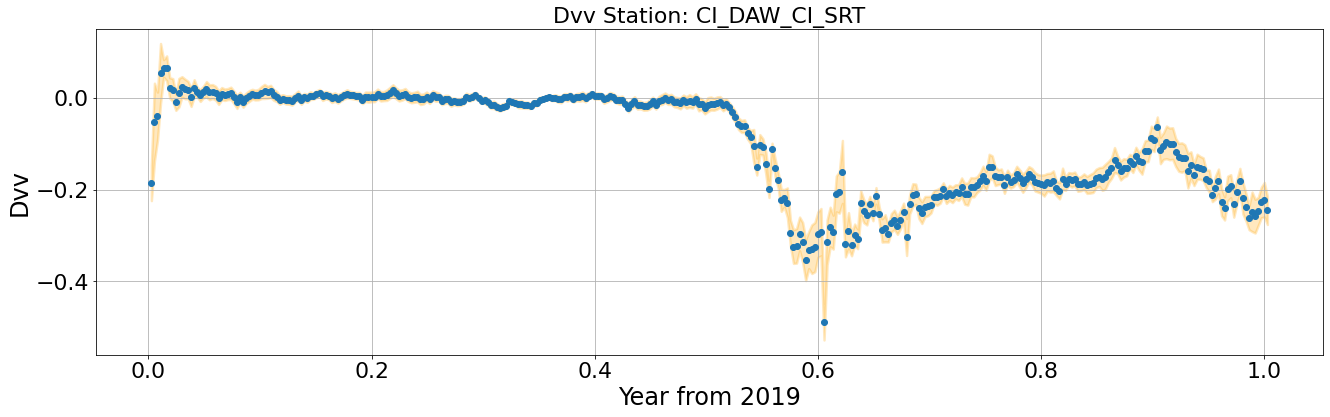

In [35]:
#plt.plot(decimal_time_lapse_dvv, dvv_median.dvv*1)
plt.plot(decimal_time_lapse_dvv, dvv_median.dvv*1, 'o' , label='observed data after medinan filter with '+smooth_tw)


plt.fill_between(decimal_time_lapse_dvv, (dvv_median.dvv-dvv_median.dvv_2sd), 
                 (dvv_median.dvv+dvv_median.dvv_2sd), alpha=0.25,linewidth = 2.5, color="orange")



#plt.fill_between(ch02_data_amp['time'], (ch02_data_amp['amp_med']-ch02_data_amp['amp_l1']*coeff), 
#                 (ch02_data_amp['amp_med']+ch02_data_amp['amp_l1']*coeff), alpha=0.25,linewidth = 2.5, color="orange")


plt.xlabel('Year from 2019')  #modified by an 20200406
#    plt.ylabel('Viso (m/s)')
#    plt.title('Viso Station: '+sta)

#plt.ylim((-0.2,0.2)) 

plt.ylabel('Dvv') #modified by an 20200407
plt.title('Dvv Station: '+sta) #modified by an 20200409
plt.grid(True)

In [36]:
print(decimal_time_lapse_dvv[0])
print(decimal_time_lapse_dvv[-1])

0.00273972602736
1.00273224044


In [37]:
st_time = decimal_time_lapse_dvv[0] + 0.01
et_time =  decimal_time_lapse_dvv[-1] - 0.01
print(st_time)
print(et_time)
#st_time  = 0.65
#et_time =  5.0


0.0127397260274
0.992732240437


In [38]:
### adds
dttime = 0.01 
### adds

In [39]:
f = interpolate.interp1d(decimal_time_lapse_dvv, dvv_median.dvv*1, kind="cubic")
xnew_dvv = np.arange(st_time, et_time, dttime)
ynew_dvv = f(xnew_dvv)   # use interpolation function returned by `interp1d

In [40]:
len(xnew_dvv)

98

In [41]:
len(ynew_dvv)

98

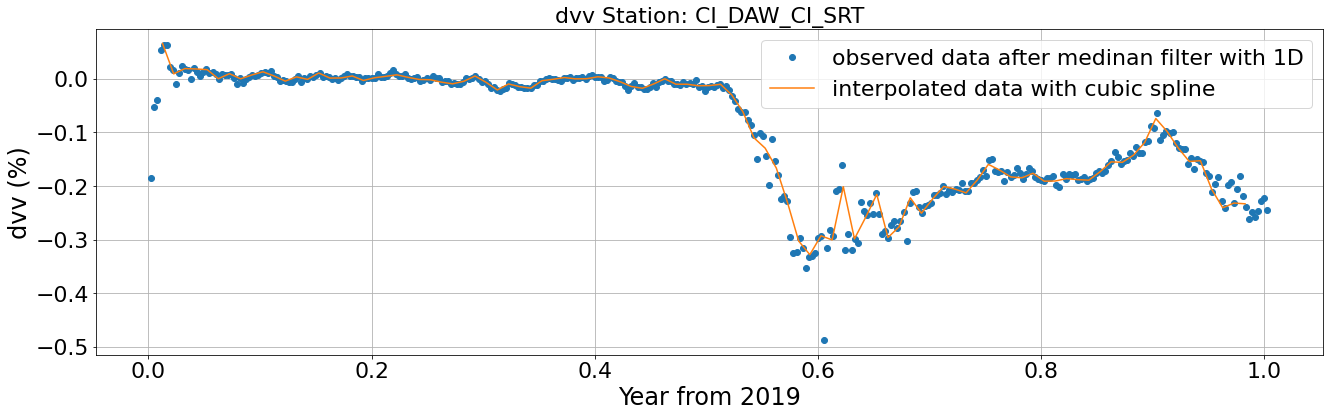

In [42]:
plt.plot(decimal_time_lapse_dvv, dvv_median.dvv*1, 'o' , label='observed data after medinan filter with '+smooth_tw)
plt.plot(xnew_dvv, ynew_dvv, '-' , label='interpolated data with cubic spline')
   
#plt.ylim((-0.7,0.1)) #modified by an 20200407
#plt.xlabel('Year from 2002') #modified by an 20200407
plt.xlabel('Year from 2019') #modified by an 20200407
plt.ylabel('dvv (%)')
plt.title('dvv Station: '+sta)
plt.grid(True)
#plt.legend(loc='upper left') #modified by an 20200407
plt.legend(loc='upper right') #modified by an 20200407

In [43]:

xnew_fit = xnew_dvv
ynew_fit = ynew_dvv

In [44]:
from datetime import datetime, timedelta

In [45]:
def year_decimal(start):
    year = int(start)
    rem = start - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #print(result)
    return result

In [46]:
#xnew_fitOUT = xnew_fit + 2008
#xnew_fitOUT = xnew_fit + 2002 #modified by an 20200409
xnew_fitOUT = xnew_fit + 2019 #modified by an 20200409

In [47]:
print(xnew_fitOUT[0])

2019.01273973


In [48]:
#year_time = np.zeros(len(decimal_time))
#year_time = (len(decimal_time))
year_time = []
#decimal_time_lapse = np.zeros(len(time))

for i in range(len(xnew_fitOUT)):
    #print(i)
    yt_tmp = year_decimal(xnew_fitOUT[i])
    yt_tmp2 = yt_tmp.strftime("%Y-%m-%dT%H:%M:%S.%f")

    #decimal_time[i] = decimal_year(dt)
    #year_time.append(yt_tmp)
    year_time.append(yt_tmp2)
    
#decimal_time_lapse = decimal_time - decimal_ref_time

In [49]:
print(year_time[0])

2019-01-05T15:35:59.999998


In [50]:
year_timedf = pd.DataFrame(year_time)

In [51]:
print(decimal_time_lapse_RC71eq)


0.5099693366312295


In [52]:
# seasonality 
e1_min = -np.inf
e1_max = np.inf
e2_min = -np.inf
e2_max = np.inf
# seasonality 
e3_min = -np.inf
e3_max = np.inf
e4_min = -np.inf
e4_max = np.inf

if seasonality_off:
    e1_min = -0.000001
    e1_max = 0.000001
    e2_min = -0.000001
    e2_max = 0.000001
    # seasonality 
    e3_min = -0.000001
    e3_max = 0.000001
    e4_min = -0.000001
    e4_max = 0.000001

#  freq. seasonality 
f_min = 0.999999
f_max = 1.000001

# offset 
A_min = -np.inf
A_max = np.inf

# liner trend
B_min = -np.inf
B_max = np.inf
if longterm_trend_off:
    B_min = -0.00001
    B_max = 0.000001
    
# no longer used should be 0
C_min = -0.0000001
C_max = 0.0000001
if C_on:
    C_min = -5
    C_max = 5

# coseismic change. currently assuming negative value
D_min = -np.inf
D_max = 0
#D_max = np.inf

# recover time -> should be positive
E_min = 0
E_max = np.inf
#E_max = 10.0


# eqT
#eqT_low = decimal_time_lapse_RC71eq   -0.00001
#eqT_high = decimal_time_lapse_RC71eq +0.00001

eqT_low = decimal_time_lapse_RC71eq   -0.000001
eqT_high = decimal_time_lapse_RC71eq +1
eqT_high = decimal_time_lapse_RC71eq +0.1
#eqT_high = decimal_time_lapse_RC71eq +0.05


In [53]:
#   #  e1     e2                       f           A          B             e3      e4        C           D           E         eqT             C2                  
#    ([-np.inf, -np.inf,   0.999999,  -np.inf,  -np.inf, -np.inf, -np.inf, -np.inf, -np.inf,      0,    eqT_low,   -np.inf,  -np.inf,           0,   eqT_low2],
#[     np.inf,  np.inf,   1.000001,    np.inf,   np.inf,  np.inf,   np.inf,  np.inf,         0, np.inf,  eqT_high,    np.inf,          0,    np.inf,    eqT_high2]) 

param_bounds_eq=([e1_min, e2_min, f_min,  A_min, B_min, e3_min, e4_min, C_min, D_min, E_min,   eqT_low],
                                     [e1_max, e2_max, f_max,  A_max, B_max, e3_max, e4_max, C_max, D_max, E_max,   eqT_high])





In [54]:
e1_init = 1.0
e2_init = 1.0
e3_init = 1.0
e4_init = 1.0

if seasonality_off:
    e1_init = 0.0
    e2_init = 0.0
    e3_init = 0.0
    e4_init = 0.0

f_init = 1.0
A_init = 0.1

B_init = 0.1
if longterm_trend_off:
    B_init = 0.0

C_init = 0.0
D_init = -1.0
E_init = 1.0


popt, pcov = curve_fit(func_eq, xnew_fit, ynew_fit, p0=(e1_init, e2_init,f_init, A_init, B_init, e3_init, e4_init, C_init, D_init, E_init, decimal_time_lapse_RC71eq), bounds=param_bounds_eq)     #modified by an 20200421
    
    
    
    
    

In [55]:
# if h1 = 0.5 && h2 = 1.0 -> 

if h2OPT:
    h1_init = 0.5
    h2_init = 1.0

    h1_min =  0.499999
    h1_max = 0.500001

    h2_min =  0.9999999
    h2_max = 1.00001
    
    #h1_min =  -np.inf
    #h1_min = 0.0
    #h1_max = np.inf

    h2_min =  -np.inf
    h2_max = np.inf
    h2_min =  0.99
    h2_max = 1.01
        
    param_bounds_eq=([e1_min, e2_min, f_min,  A_min, B_min, e3_min, e4_min, C_min, D_min, E_min,   eqT_low, h1_min, h2_min],
                                     [e1_max, e2_max, f_max,  A_max, B_max, e3_max, e4_max, C_max, D_max, E_max,   eqT_high, h2_max, h2_max])

    popt, pcov = curve_fit(func_eq2, xnew_fit, ynew_fit, p0=(e1_init, e2_init,f_init, A_init, B_init, e3_init, e4_init, C_init, D_init, E_init, decimal_time_lapse_RC71eq, h1_init, h2_init), bounds=param_bounds_eq)     #modified by an 20200421



In [56]:
if stepOPT:

    sc_init = 5.0
    sc_min =  5.0
    sc_max =  100

    #sc_init = 1.0
    #sc_min =  1.0
    #sc_max =  100 
    sc_init = 10.0
    sc_min =  10.0
    sc_max =  1000     
    param_bounds_eq=([e1_min, e2_min, f_min,  A_min, B_min, e3_min, e4_min, C_min, D_min, E_min,   eqT_low, sc_min],
                                     [e1_max, e2_max, f_max,  A_max, B_max, e3_max, e4_max, C_max, D_max, E_max,   eqT_high, sc_max])

    popt, pcov = curve_fit(func_eq_step, xnew_fit, ynew_fit, p0=(e1_init, e2_init,f_init, A_init, B_init, e3_init, e4_init, C_init, D_init, E_init, decimal_time_lapse_RC71eq, sc_init), bounds=param_bounds_eq)     #modified by an 20200421


In [57]:
print (popt)
print (pcov)
#Print results
print("e1 =  %.5f +/- %.5f" % (popt[0], math.sqrt(pcov[0, 0])))
print("e2 = %.5f +/- %.5f" % (popt[1], math.sqrt(pcov[1, 1])))
print("f =  %.5f +/- %.5f" % (popt[2], math.sqrt(pcov[2, 2])))
print("A =  %.5f +/- %.5f" % (popt[3], math.sqrt(pcov[3, 3])))
print("B =  %.5f +/- %.5f" % (popt[4], math.sqrt(pcov[4, 4])))
print("e3 =  %.5f +/- %.5f" % (popt[5], math.sqrt(pcov[5, 5])))
print("e4 = %.5f +/- %.5f" % (popt[6], math.sqrt(pcov[6, 6])))

[ -1.00000000e-06   1.00000000e-06   1.00000100e+00   8.48540515e-04
  -1.00000000e-05   1.00000000e-06   1.00000000e-06  -1.63007548e-01
  -2.55685720e-01   8.57599265e-02   5.66048045e-01   3.22660991e+01]
[[  3.43577317e-03  -9.44558392e-03   1.12779776e+02   8.36828328e-03
   -4.27631800e-02   1.72709438e-03   7.71811823e-04   4.41425130e-02
   -2.79638520e-02   1.66124824e-02  -3.68125238e-04   4.63120482e-01]
 [ -9.44558392e-03   2.86535077e-02  -2.98080337e+02  -2.57185224e-02
    1.28475534e-01  -5.28094808e-03  -2.23149870e-03  -1.32875931e-01
    8.32543040e-02  -5.25750932e-02   1.43141351e-03  -1.30704815e+00]
 [  1.12779776e+02  -2.98080337e+02   1.00418098e+07   2.78656945e+02
   -1.43508701e+03   7.21525458e+01  -5.38619624e+00   1.39753502e+03
   -9.32655643e+02   4.55159558e+02  -3.75098780e+00   1.40668551e+04]
 [  8.36828328e-03  -2.57185224e-02   2.78656945e+02   2.32925305e-02
   -1.15840654e-01   4.72593269e-03   1.91884637e-03   1.19404329e-01
   -7.44569979e-02 

In [58]:
print("C =  %.5f +/- %.5f" % (popt[7], math.sqrt(pcov[7, 7])))
print("D =  %.5f +/- %.5f" % (popt[8], math.sqrt(pcov[8, 8])))
print("E =  %.5f +/- %.5f" % (popt[9], math.sqrt(pcov[9, 9])))
print("eqT = %.5f +/- %.5f" % (popt[10], math.sqrt(pcov[10, 10])))

C =  -0.16301 +/- 0.78574
D =  -0.25569 +/- 0.49631
E =  0.08576 +/- 0.31588
eqT = 0.56605 +/- 0.01259


In [59]:
if h2OPT:

    print("h1 = %.5f +/- %.5f" % (popt[11], math.sqrt(pcov[11, 11]))) #modified by an 20200421
    print("h2 = %.5f +/- %.5f" % (popt[12], math.sqrt(pcov[12, 12]))) #modified by an 20200421

In [60]:
if stepOPT:
    print("sc = %.5f +/- %.5f" % (popt[11], math.sqrt(pcov[11, 11]))) 

sc = 32.26610 +/- 10.16979


In [61]:
perr = np.sqrt(np.diag(pcov))

e1=popt[0]
e2=popt[1]
f=popt[2]
A=popt[3]
B=popt[4]

e3=popt[5]
e4=popt[6]

e1sd = math.sqrt(pcov[0, 0])
e2sd = math.sqrt(pcov[1, 1])
fsd = math.sqrt(pcov[2, 2])

Asd = math.sqrt(pcov[3, 3])
Bsd = math.sqrt(pcov[4, 4])
e3sd = math.sqrt(pcov[5, 5])
e4sd = math.sqrt(pcov[6, 6])


#e1 = 0.5
#e2 = 0.5
phi=math.atan2(1*e1,e2)
phi_deg=(phi*180.0)/math.pi
phi_deg2=360+phi_deg

phi_day = (phi_deg / 360.0) *366.0

e1_2=e1*e1
e2_2=e2*e2
etmp=e1_2+e2_2
e=math.sqrt(etmp)


phi4p=math.atan2(1*e3,e4)
phi4p_deg=(phi4p*180.0)/math.pi
phi4p_deg2=360+phi4p_deg

phi4p_day = (phi4p_deg / 360.0) *366.0

e3_2=e3*e3
e4_2=e4*e4
etmp4p=e3_2+e4_2
e4p=math.sqrt(etmp4p)


e_ratio =  e4p / e


print("e1 =  %.5f "% (e1))

print("e2 =  %.5f "% (e2))
print("e =  %.5f "% (e))
print("f(1/year) =  %.5f "% (f))
print("A =  %.5f "% (A))
print("B =  %.5f "% (B))



print("e1sd =  %.5f "% (e1sd))
print("e2sd =  %.5f "% (e2sd))
print("f(1/year)sd =  %.5f "% (fsd))
print("Asd =  %.5f "% (Asd))
print("Bsd =  %.5f "% (Bsd))


print("phi =  %.5f "% (phi))
print("phi_deg =  %.5f "% (phi_deg))
print("phi_deg2 =  %.5f "% (phi_deg2))

print("e3 =  %.5f "% (e3))
print("e4 =  %.5f "% (e4))


print("e3sd =  %.5f "% (e3sd))
print("e4sd =  %.5f "% (e4sd))

print("e4p =  %.5f "% (e4p))



print("phi4p =  %.5f "% (phi4p))
print("phi4p_deg =  %.5f "% (phi4p_deg))
print("phi4p_deg2 =  %.5f "% (phi4p_deg2))


print("phi_day =  %.5f "% (phi_day))
print("phi4p_day =  %.5f "% (phi4p_day))
print("e_ratio =  %.5f "% (e_ratio))

# cos (w - phi) 

e1 =  -0.00000 
e2 =  0.00000 
e =  0.00000 
f(1/year) =  1.00000 
A =  0.00085 
B =  -0.00001 
e1sd =  0.05862 
e2sd =  0.16927 
f(1/year)sd =  3168.88147 
Asd =  0.15262 
Bsd =  0.76122 
phi =  -0.78540 
phi_deg =  -45.00000 
phi_deg2 =  315.00000 
e3 =  0.00000 
e4 =  0.00000 
e3sd =  0.03298 
e4sd =  0.01880 
e4p =  0.00000 
phi4p =  0.78540 
phi4p_deg =  45.00000 
phi4p_deg2 =  405.00000 
phi_day =  -45.75000 
phi4p_day =  45.75000 
e_ratio =  1.00000 


In [62]:
C=popt[7]
D=popt[8]
E=popt[9]
eqT=popt[10]

Csd = math.sqrt(pcov[7, 7])
Dsd = math.sqrt(pcov[8, 8])
Esd = math.sqrt(pcov[9, 9])
eqTsd = math.sqrt(pcov[10, 10])


print("C =  %.5f "% (C))
print("D =  %.5f "% (D))
print("E =  %.5f "% (E))
print("eqT =  %.5f "% (eqT))

print("Csd =  %.5f "% (Csd))
print("Dsd =  %.5f "% (Dsd))
print("Esd =  %.5f "% (Esd))
print("eqTsd =  %.5f "% (eqTsd))

C =  -0.16301 
D =  -0.25569 
E =  0.08576 
eqT =  0.56605 
Csd =  0.78574 
Dsd =  0.49631 
Esd =  0.31588 
eqTsd =  0.01259 


In [63]:
if h2OPT:

    h1=popt[11] #modified by an 20200421
    h2=popt[12] #modified by an 20200421

    print("h1 =  %.5f "% (h1)) #modified by an 20200421
    print("h2 =  %.5f "% (h2)) #modified by an 20200421



In [64]:
if stepOPT:
    sc=popt[11] 
    scsd = math.sqrt(pcov[11, 11])

    print("sc =  %.5f "% (sc)) 
    print("scsd =  %.5f "% (scsd)) 



sc =  32.26610 
scsd =  10.16979 


In [65]:
resi_fit = np.zeros(len(xnew_fit))
yOUT_fit = np.zeros(len(ynew_fit))
yOUT_fit_1st = np.zeros(len(ynew_fit))
yOUT_fit_2nd = np.zeros(len(ynew_fit))
for i in range(len(xnew_fit)):
  # print xdata[i]
    #yOUT_fit[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) + e2*np.cos(2*math.pi*f*xnew_fit[i])
        yOUT_fit[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
                                         e2*np.cos(2*math.pi*f*xnew_fit[i])+\
                                     e3*np.sin(4*math.pi*f*xnew_fit[i]) + \
                                     e4*np.cos(4*math.pi*f*xnew_fit[i])+ \
                                     (C+ (D*np.exp(-(xnew_fit[i]-eqT)/E) )  ) *heaviside(xnew_fit[i] -eqT) #modified by an 20200421

        
#    yOUT_fit[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
#                                    e2*np.cos(2*math.pi*f*xnew_fit[i])+\
#                                    e3*np.sin(4*math.pi*f*xnew_fit[i]) + \
#                                    e4*np.cos(4*math.pi*f*xnew_fit[i])+ \
#                                    (C+ (D*np.exp(-(xnew_fit[i]-eqT)/E) )  ) *h1*(heaviside(xnew_fit[i] -eqT)+ h2) #modified by an 20200421
  #print yOUT[i]
        resi_fit[i]=ynew_fit[i]-yOUT_fit[i]
  #print resi[i]
        yOUT_fit_1st[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
                                    e2*np.cos(2*math.pi*f*xnew_fit[i])
        yOUT_fit_2nd[i]= A + B*xnew_fit[i]+e3*np.sin(4*math.pi*f*xnew_fit[i]) +\
                                    e4*np.cos(4*math.pi*f*xnew_fit[i])

In [66]:
if h2OPT:
    resi_fit = np.zeros(len(xnew_fit))
    yOUT_fit = np.zeros(len(ynew_fit))
    yOUT_fit_1st = np.zeros(len(ynew_fit))
    yOUT_fit_2nd = np.zeros(len(ynew_fit))
    for i in range(len(xnew_fit)):
        yOUT_fit[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
                                       e2*np.cos(2*math.pi*f*xnew_fit[i])+\
                                    e3*np.sin(4*math.pi*f*xnew_fit[i]) + \
                                    e4*np.cos(4*math.pi*f*xnew_fit[i])+ \
                                    (C+ (D*np.exp(-(xnew_fit[i]-eqT)/E) )  ) *h1*(heaviside2(xnew_fit[i] -eqT)+ h2) #modified by an 20200421
  #print yOUT[i]
        resi_fit[i]=ynew_fit[i]-yOUT_fit[i]
  #print resi[i]
        yOUT_fit_1st[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
                                    e2*np.cos(2*math.pi*f*xnew_fit[i])
        yOUT_fit_2nd[i]= A + B*xnew_fit[i]+e3*np.sin(4*math.pi*f*xnew_fit[i]) +\
                                    e4*np.cos(4*math.pi*f*xnew_fit[i])

In [67]:
#def func_eq_step(x, e1, e2, f, A, B, e3, e4, C, D, E, eqT, sc):

if stepOPT:
    resi_fit = np.zeros(len(xnew_fit))
    yOUT_fit = np.zeros(len(ynew_fit))
    yOUT_fit_1st = np.zeros(len(ynew_fit))
    yOUT_fit_2nd = np.zeros(len(ynew_fit))
    for i in range(len(xnew_fit)):
        #yOUT_fit[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
        #                               e2*np.cos(2*math.pi*f*xnew_fit[i])+\
        #                            e3*np.sin(4*math.pi*f*xnew_fit[i]) + \
        #                            e4*np.cos(4*math.pi*f*xnew_fit[i])+ \
        #                            (C+ (D*np.exp(-(xnew_fit[i]-eqT)/E) )  ) * (step(xnew_fit[i],eqT, sc)) #modified by an 20200421
        yOUT_fit[i] = func_eq_step(xnew_fit[i], e1, e2, f, A, B, e3, e4, C, D, E, eqT, sc )

        
  #print yOUT[i]
        resi_fit[i]=ynew_fit[i]-yOUT_fit[i]
  #print resi[i]
        yOUT_fit_1st[i]= A + B*xnew_fit[i]+e1*np.sin(2*math.pi*f*xnew_fit[i]) +\
                                    e2*np.cos(2*math.pi*f*xnew_fit[i])
        yOUT_fit_2nd[i]= A + B*xnew_fit[i]+e3*np.sin(4*math.pi*f*xnew_fit[i]) +\
                                    e4*np.cos(4*math.pi*f*xnew_fit[i])
    

In [68]:
resi_sq= np.sum(resi_fit**2)
print(resi_sq)
data_sq= np.sum(ynew_fit**2)
print(data_sq)
VR = (1 - (resi_sq/data_sq)) * 100
print(VR)

0.0636721805478
1.96492733545
96.7595656389


In [69]:
type(f)

numpy.float64

In [70]:
s = "e1 =  %.5f "% (e1)
print(s)

e1 =  -0.00000 


In [71]:
recovery_end_time = eqT + E
print(recovery_end_time)
recovery_end_time_sd = eqT + E +  math.sqrt(pcov[9, 9])
print(recovery_end_time_sd)

0.651807971197
0.967687457633


In [72]:
#if recovery_end_time > 5:
#    recovery_end_time = 5

In [73]:
# compute synthetic data
max_year = 300
time_synthetic = np.arange(0,max_year,0.01)
dvv_synthetic = np.zeros(len(time_synthetic))
for i in range(len(time_synthetic)):
    dvv_synthetic[i] = func_eq_step(time_synthetic[i], e1, e2, f, A, B, e3, e4, C, D, E, eqT, sc)


In [74]:
#print(dvv_synthetic)

In [75]:
dvv_static = func_eq_step(recovery_end_time, e1, e2, f, A, B, e3, e4, C, D, E, eqT, sc)
dvv_dynamic = D - dvv_static
print("# dvv_static = ", dvv_static, "dvv_dynamic = ", dvv_dynamic, " D = ",D)
      

# dvv_static =  -0.255215005632 dvv_dynamic =  -0.000470714452634  D =  -0.255685720084


In [76]:
VROUTOPT = 1

if VROUTOPT:
    #vr_fi = "VR.out_rmedian_center."+str(smooth_tw )+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+".030.dttwithoffset.static_1.0_5.0_10.0_both_0.85_0.1_0.5.out"
    vr_fi = "VR.out_"+sta+"_smtw"+str(smooth_tw )+"_"+xc_para
    if dvv_2sdOPT:
        #dvv2sd_"+str(dvv_2sd_max)+"."
        #vr_fi = "VR.out_rmedian_center."+str(smooth_tw )+"_dvv2sd_"+str(dvv_2sd_max)+"."+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+".030.dttwithoffset.static_1.0_5.0_10.0_both_0.85_0.1_0.5.out"
        #vr_fi = "VR.out_"+sta+"."+xc_para+str(smooth_tw )+"_dvv2sd_"+str(dvv_2sd_max)
        vr_fi = "VR.out_"+sta+"_smtw"+str(smooth_tw )+"_dvv2sd_"+str(dvv_2sd_max)+"_"+xc_para


    fi = open(vr_fi, 'w')
    #s = 'The value of x is ' + repr(x) + ', and y is ' + repr(y) + '...'
    s = "# VR = "+str(VR)+"\n"
    fi.write(s)

    s = "# st_time = "+str(st_time)+"\n"
    fi.write(s)

    s = "# et_time = "+str(et_time)+"\n"
    fi.write(s)

    s = "# dttime = "+str(dttime)+"\n"
    fi.write(s)

    s = "# smooth_tw  = "+str( smooth_tw )+"\n"
    fi.write(s)


    
    s = "# e1 =  %.5f "% (e1)+"\n"
    fi.write(s)

    s = "# e2 =  %.5f "% (e2)+"\n"
    fi.write(s)

    s = "# e =  %.5f "% (e)+"\n"
    fi.write(s)


    s = "# f  =  %.5f "% (f)+"\n"
    fi.write(s)

    s = "# A =  %.5f "% (A)+"\n"
    fi.write(s)

    s = "# B =  %.5f "% (B)+"\n"
    fi.write(s)

    s = "# C =  %.5f "% (C)+"\n"
    fi.write(s)

    s = "# D =  %.5f "% (D)+"\n"
    fi.write(s)

    s = "# E =  %.5f "% (E)+"\n"
    fi.write(s)


    s = "# eqT =  %.5f "% (eqT)+"\n"
    fi.write(s)


    s = "# e1sd =  %.5f "% (e1sd)+"\n"
    fi.write(s)

    s = "# e2sd =  %.5f "% (e2sd)+"\n"
    fi.write(s)

    s = "# fsd  =  %.5f "% (fsd)+"\n"
    fi.write(s)

    s = "# Asd =  %.5f "% (Asd)+"\n"
    fi.write(s)

    s = "# Bsd =  %.5f "% (Bsd)+"\n"
    fi.write(s)


    s = "# Csd =  %.5f "% (Csd)+"\n"
    fi.write(s)

    s = "# Dsd =  %.5f "% (Dsd)+"\n"
    fi.write(s)

    s = "# Esd =  %.5f "% (Esd)+"\n"
    fi.write(s)

    s = "# eqTsd =  %.5f "% (eqTsd)+"\n"
    fi.write(s)

    
    if stepOPT == 1:
    #if kOPT == 1:
        s = "# sc =  %.5f "% (sc)+"\n"
        fi.write(s)

        s = "# scsd =  %.5f "% (scsd)+"\n"

        fi.write(s)



    s = "# phi =  %.5f "% (phi)+"\n"
    fi.write(s)

    s = "# phi_deg =  %.5f "% (phi_deg)+"\n"
    fi.write(s)

    s = "# phi_deg2 =  %.5f "% (phi_deg2)+"\n"
    fi.write(s)

    s = "# e3 =  %.5f "% (e3)+"\n"
    fi.write(s)

    s = "# e4 =  %.5f "% (e4)+"\n"
    fi.write(s)

    s = "# e3sd =  %.5f "% (e3sd)+"\n"
    fi.write(s)

    s = "# e4sd =  %.5f "% (e4sd)+"\n"
    fi.write(s)

    s = "# e4p =  %.5f "% (e4p)+"\n"
    fi.write(s)

    s = "# phi4p =  %.5f "% (phi4p)+"\n"
    fi.write(s)

    s = "# phi4p_deg =  %.5f "% (phi4p_deg)+"\n"
    fi.write(s)

    s = "# phi4p_deg2 =  %.5f "% (phi4p_deg2)+"\n"
    fi.write(s)

    s = "# phi_day =  %.5f "% (phi_day)+"\n"
    fi.write(s)

    s = "# phi4p_day =  %.5f "% (phi4p_day)+"\n"
    fi.write(s)

    s = "# e_ratio =  %.5f "% (e_ratio)+"\n"
    fi.write(s)

    # dvv_static =  -0.355868939121 dvv_dynamic =  -0.195715874693  D =  -0.551584813815
    s = "# dvv_static =  %.5f "% (dvv_static)+"\n"
    fi.write(s)
    
    s = "# dvv_dynamic =  %.5f "% (dvv_dynamic)+"\n"
    fi.write(s)   
    
    #recovery_end_time
    s = "# recovery_end_time =  %.5f "% (recovery_end_time)+"\n"
    fi.write(s)   
    
    #f.write('2: 2nd line\n')
    #f.write('2: last line\n')

    fi.close()

In [77]:
print("VR = %.5f" %VR)
print("e1 =  %.5f +/- %.5f" % (popt[0], math.sqrt(pcov[0, 0])))
print("e2 = %.5f +/- %.5f" % (popt[1], math.sqrt(pcov[1, 1])))
print("f =  %.5f +/- %.5f" % (popt[2], math.sqrt(pcov[2, 2])))
print("A =  %.5f +/- %.5f" % (popt[3], math.sqrt(pcov[3, 3])))
print("B =  %.5f +/- %.5f" % (popt[4], math.sqrt(pcov[4, 4])))
print("e3 =  %.5f +/- %.5f" % (popt[5], math.sqrt(pcov[5, 5])))
print("e4 = %.5f +/- %.5f" % (popt[6], math.sqrt(pcov[6, 6])))
print("C =  %.5f +/- %.5f" % (popt[7], math.sqrt(pcov[7, 7])))
print("D =  %.5f +/- %.5f" % (popt[8], math.sqrt(pcov[8, 8])))
print("E =  %.5f +/- %.5f" % (popt[9], math.sqrt(pcov[9, 9])))
print("eqT = %.5f +/- %.5f" % (popt[10], math.sqrt(pcov[10, 10])))


VR = 96.75957
e1 =  -0.00000 +/- 0.05862
e2 = 0.00000 +/- 0.16927
f =  1.00000 +/- 3168.88147
A =  0.00085 +/- 0.15262
B =  -0.00001 +/- 0.76122
e3 =  0.00000 +/- 0.03298
e4 = 0.00000 +/- 0.01880
C =  -0.16301 +/- 0.78574
D =  -0.25569 +/- 0.49631
E =  0.08576 +/- 0.31588
eqT = 0.56605 +/- 0.01259


In [78]:
if h2OPT:
    print("h1 = %.5f +/- %.5f" % (popt[11], math.sqrt(pcov[11, 11]))) #modified by an 20200421
    print("h2 = %.5f +/- %.5f" % (popt[12], math.sqrt(pcov[12, 12]))) #modified by an 20200421

In [79]:
if stepOPT:
    print("sc = %.5f +/- %.5f" % (popt[11], math.sqrt(pcov[11, 11]))) 

sc = 32.26610 +/- 10.16979


In [80]:
#vr_fi = "VR.out_"+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+".030.dttwithoffset.static_1.0_5.0_10.0_both_0.85_0.1_0.5.out"
#print(vr_fi)
# store output in pandas dataframe
#df = pd.DataFrame({ 'VR' : VRout
#                  })
# save 
#df.to_csv(vr_fi,index=False)

In [81]:
year_timedf = pd.DataFrame(year_time)

In [82]:
dvvOUTOPT = 0 

if dvvOUTOPT:
    dvvOUT_fi = "dvvOUT_rmedian_center."+str(smooth_tw )+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+"."+paraIn+".out"

    if dvv_2sdOPT:
        #dvv2sd_"+str(dvv_2sd_max)+"."
        dvvOUT_fi = "dvvOUT_rmedian_center."+str(smooth_tw )+"_dvv2sd_"+str(dvv_2sd_max)+"."+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+"."+paraIn+".out"


    print(dvvOUT_fi)
    df = pd.DataFrame({ 'ynew_fit' : ynew_fit,
                        'xnew_fit': xnew_fit,
                        'yOUT_fit' : yOUT_fit,
                        'year_time': year_time})
    df.to_csv(dvvOUT_fi,index=False)

In [83]:
pngOUTOPT = 1 

if pngOUTOPT:
    #pngOUT_fi = "fitOUT_rmedian_center."+str(tw)+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+"."+paraIn+".png"
    pngOUT_fi = "fitOUT_"+sta+"_smtw"+str(smooth_tw )+"_"+xc_para+".png"

    if dvv_2sdOPT:
        #dvv2sd_"+str(dvv_2sd_max)+"."
        #pngOUT_fi = "fitOUT_rmedian_center."+str(tw)+"_dvv2sd_"+str(dvv_2sd_max)+"."+netIn+"_"+staIn+"_"+netIn+"_"+staIn+"."+xccomIn+"."+freqIn+"."+paraIn+".png"
        pngOUT_fi = "fitOUT_"+sta+"_smtw"+str(smooth_tw )+"_dvv2sd_"+str(dvv_2sd_max)+"_"+xc_para+".png"

        
        
print(pngOUT_fi)
        
        

fitOUT_CI_DAW_CI_SRT_smtw1D_dvv2sd_0.2_ZRT.01.030.dttwithoffset.dynamic_2.0_20.0_30.0_both_0.85_0.1_0.5.out.png


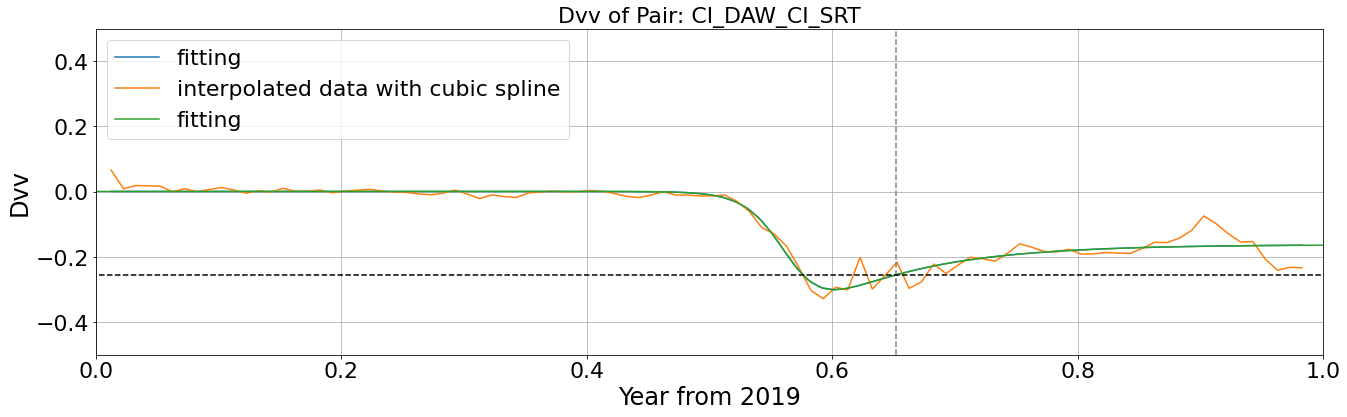

In [84]:
#plt.plot(xnew_fit, yOUT_fit_2nd)
#plt.plot(xnew_fit, yOUT_fit_1st)
#plt.plot(xnew_fit,dvv_data['viso'],label='dvv' ) #modified by an 20200409

xmin = 0
xmax = 1
#xmax = 300
ymin = -0.5
ymax = 0.5

recovery_end_plot = pd.DataFrame({'time': [recovery_end_time, recovery_end_time],
                    'val': [ymin, ymax]})


dvv_static_plot = pd.DataFrame({'time': [decimal_time_lapse_dvv[0], decimal_time_lapse_dvv[-1]],
                    'val': [dvv_static, dvv_static]})



#plt.plot(decimal_time_lapse_dvv, dvv_median.dvv*1, 'o' , label='observed data after medinan filter with '+smooth_tw)

plt.plot(xnew_fit, yOUT_fit,label='fitting')
plt.plot(xnew_fit, ynew_fit,label='interpolated data with cubic spline')

plt.plot(time_synthetic, dvv_synthetic,label='fitting')

#plt.xlabel('Year from 2002') #modified by an 20200407
plt.xlabel('Year from 2019') #modified by an 20200407
#plt.ylabel('Viso (m/s)') #modified by an 20200407
plt.ylabel('Dvv') #modified by an 20200407
plt.title('Dvv of Pair: '+sta) #modified by an 20200409
#plt.title('Viso Station: '+sta) #modified by an 20200409
plt.grid(True)
plt.legend(loc='upper left')

#plt.ylim((210,240)) #modified by an 20200407
plt.ylim((ymin,ymax)) #modified by an 20200407

plt.xlim((xmin,xmax)) #modified by an 20200407

# org
#plt.savefig("C:/Users/an/STORAGE/RESEARCH/Tools/curve_fit/jupyter/output/"+sta+'_curve_fit') #modified by an 20200424
# new
#plt.savefig("./"+sta+'_curve_fit') #modified by an 20200424


plt.plot(recovery_end_plot.time, recovery_end_plot.val, color='gray', linestyle='dashed',linewidth = 1.5)
plt.plot(dvv_static_plot.time, dvv_static_plot.val, color='black', linestyle='dashed',linewidth = 1.5)


if pngOUTOPT:
    plt.savefig(pngOUT_fi)
    
    
    